In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('merge.csv')

In [22]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Manual Labor,Occupation_Nurse,Occupation_Office Worker,Occupation_Retired,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher
0,1,27,6.1,6.0,42,6,2,1.518072,77,4200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,28,6.2,6.0,60,8,1,1.562500,75,10000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,28,5.9,4.0,30,8,3,1.555556,85,3000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,28,5.9,4.0,30,8,3,1.555556,85,3000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,29,6.3,6.0,40,7,3,1.555556,82,3500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


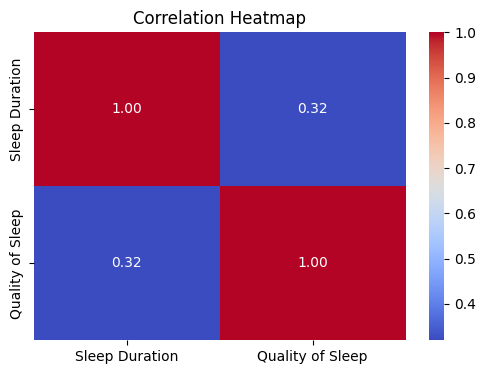

In [23]:
correlation_matrix = df[['Sleep Duration', 'Quality of Sleep']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

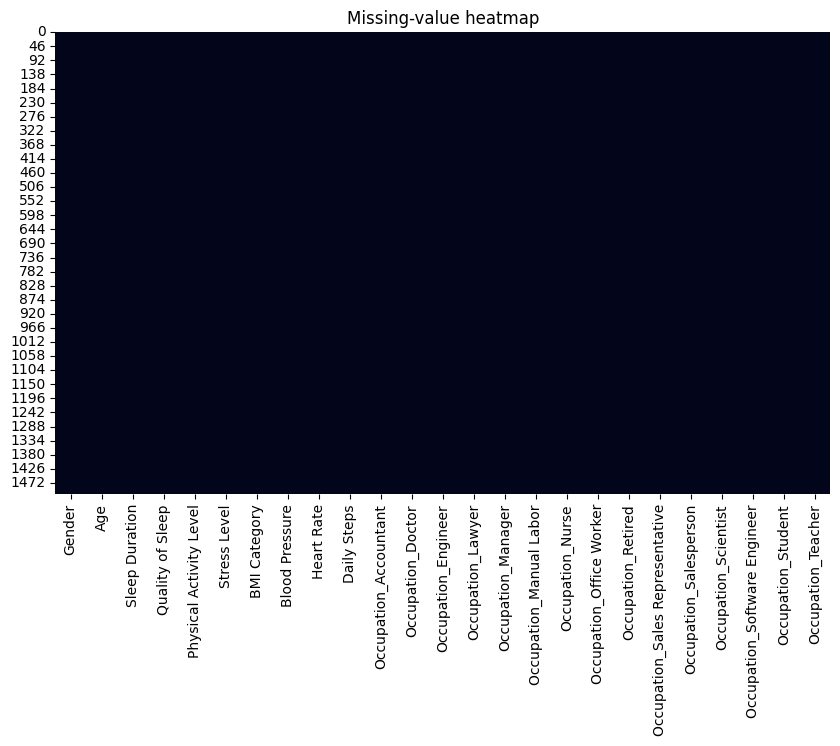

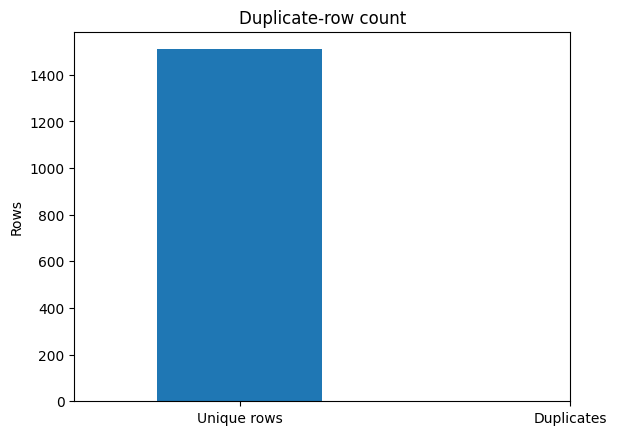

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing-value heatmap")
plt.show()
df.duplicated().value_counts().plot(kind='bar')
plt.title("Duplicate-row count")
plt.xticks([0,1], ['Unique rows','Duplicates'], rotation=0)
plt.ylabel('Rows')
plt.show()

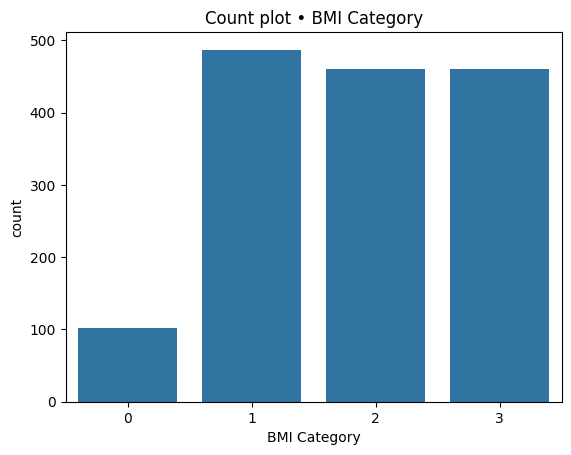

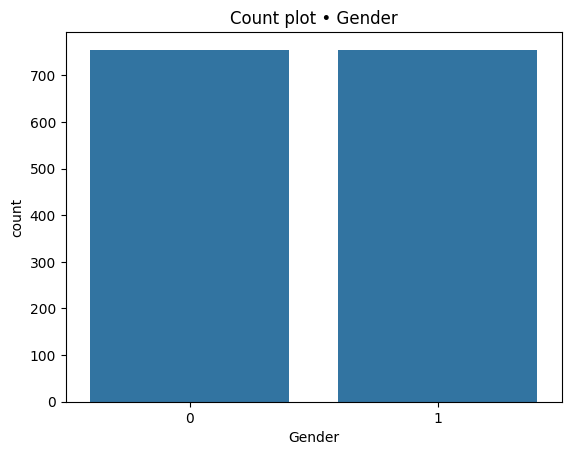

In [25]:
categorical_cols = ['BMI Category','Gender']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Count plot • {col}')
    plt.show()

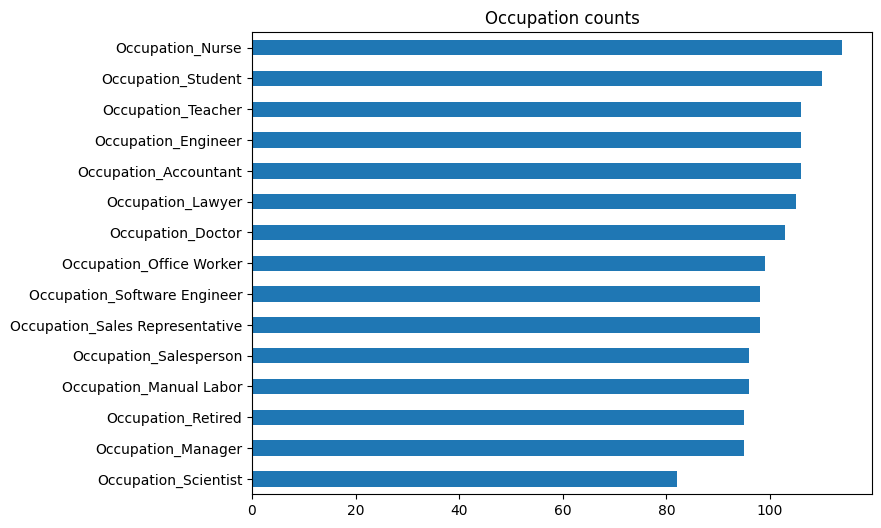

In [26]:
occ_cols = [c for c in df.columns if c.startswith('Occupation_')]
if occ_cols:
    df[occ_cols].sum().sort_values().plot(kind='barh', figsize=(8,6))
    plt.title('Occupation counts')
    plt.show()

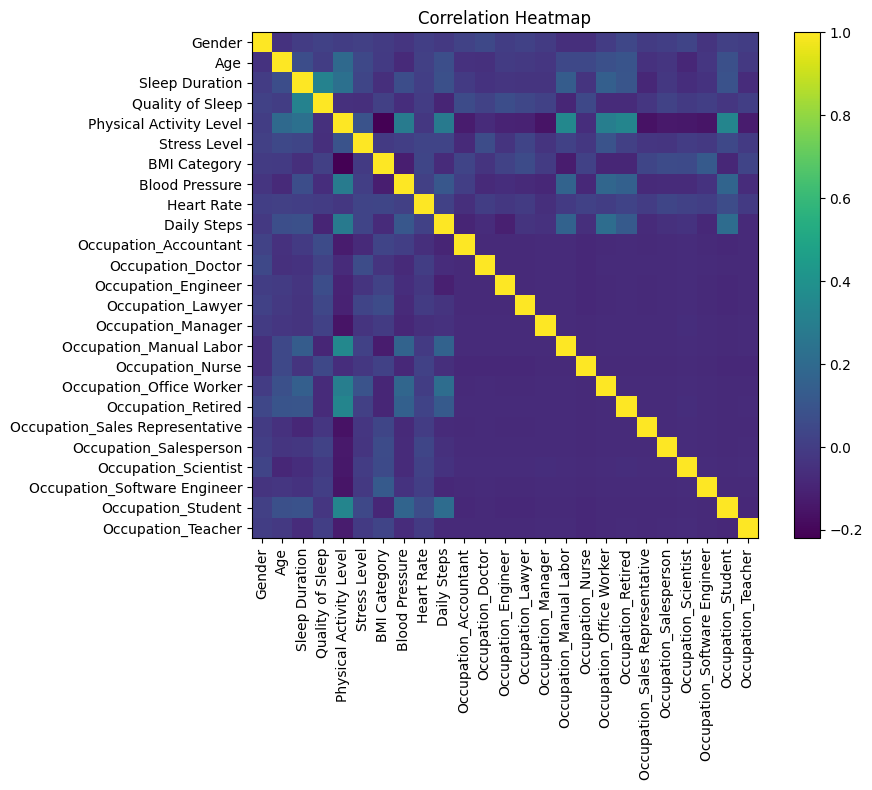

In [27]:
# Correlation Heatmap for Numeric Features
import matplotlib.pyplot as plt
numeric_df=df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='viridis')
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.tight_layout()
plt.show()


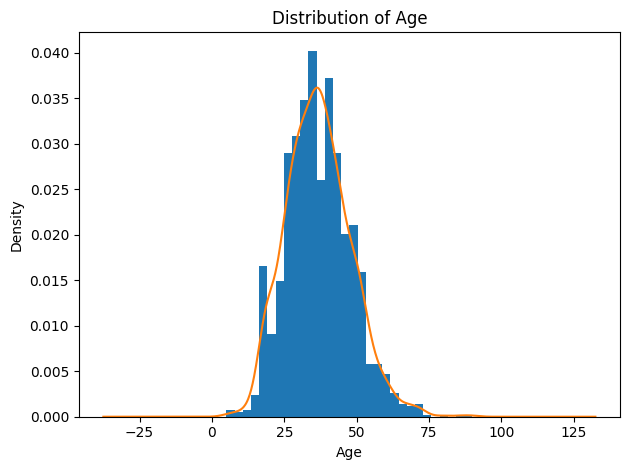

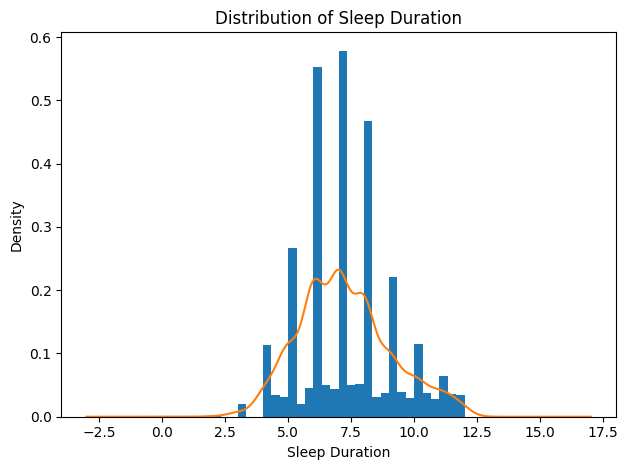

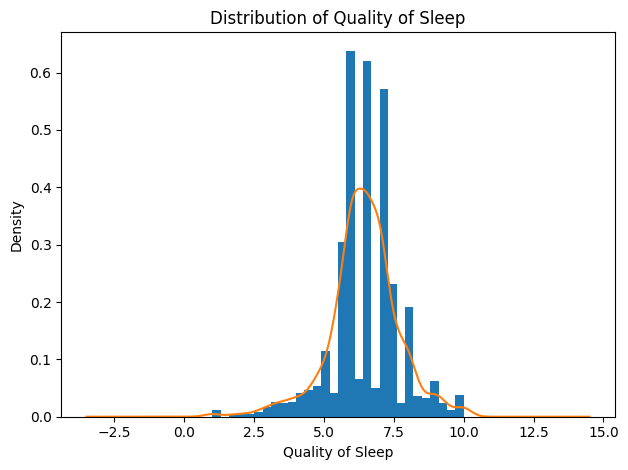

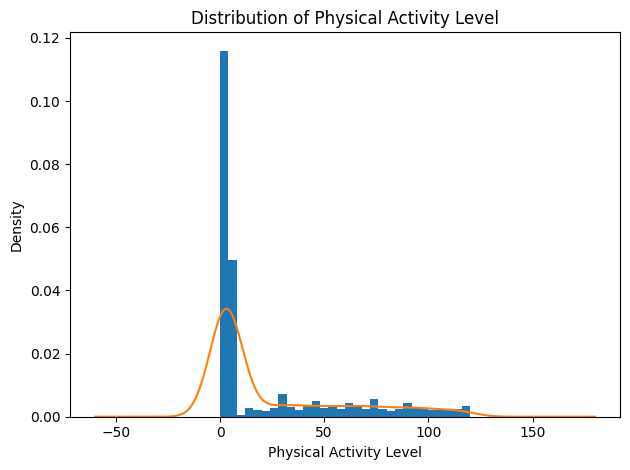

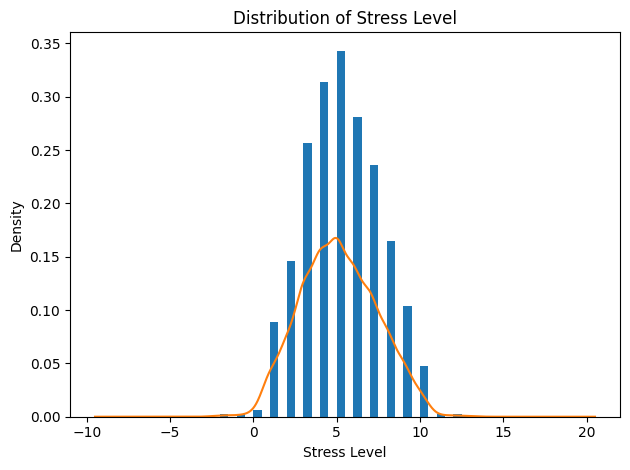

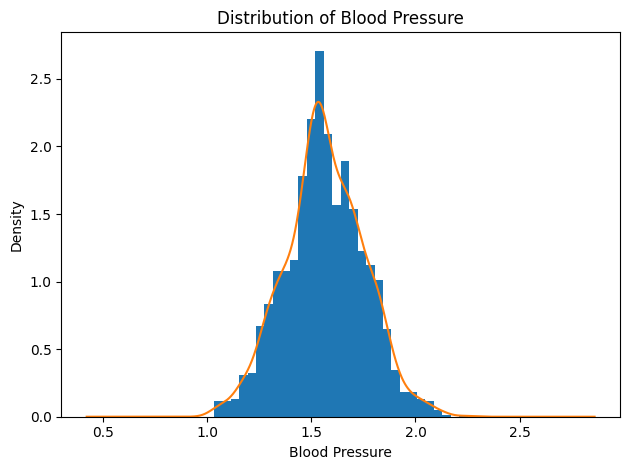

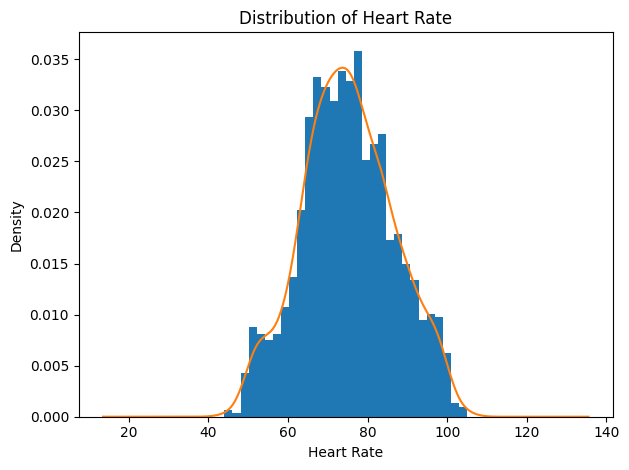

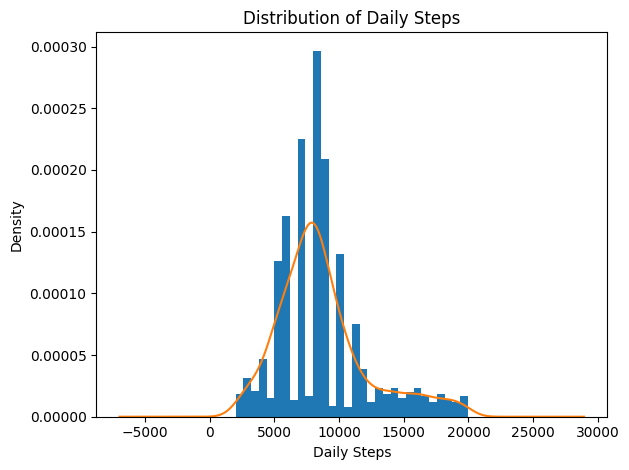

In [28]:
# Univariate Distributions for Continuous Features
import matplotlib.pyplot as plt
cont_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 
                 'Physical Activity Level', 'Stress Level', 
                 'Blood Pressure', 'Heart Rate', 'Daily Steps']
for col in cont_features:
    data=df[col].dropna()
    plt.figure()
    plt.hist(data,density=True,bins=30)
    data.plot(kind='kde')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


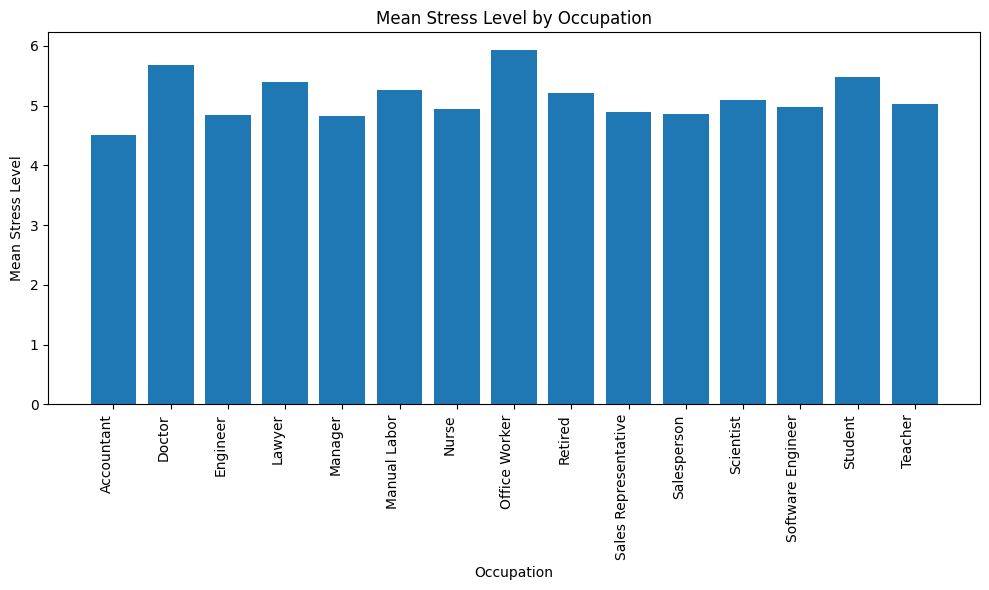

In [40]:
plt.figure(figsize=(10,6))
plt.bar(occupation_names, mean_stress)
plt.ylabel('Mean Stress Level')
plt.xlabel('Occupation')
plt.title('Mean Stress Level by Occupation')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()



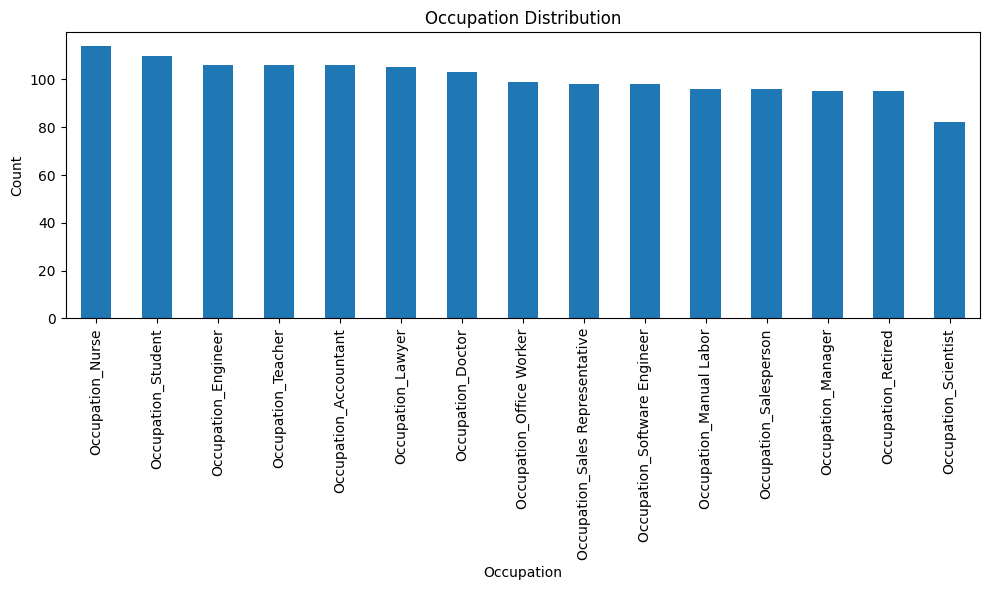

In [30]:
import matplotlib.pyplot as plt
occupation_cols=[c for c in df.columns if c.startswith('Occupation_')]
occupation_counts=df[occupation_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


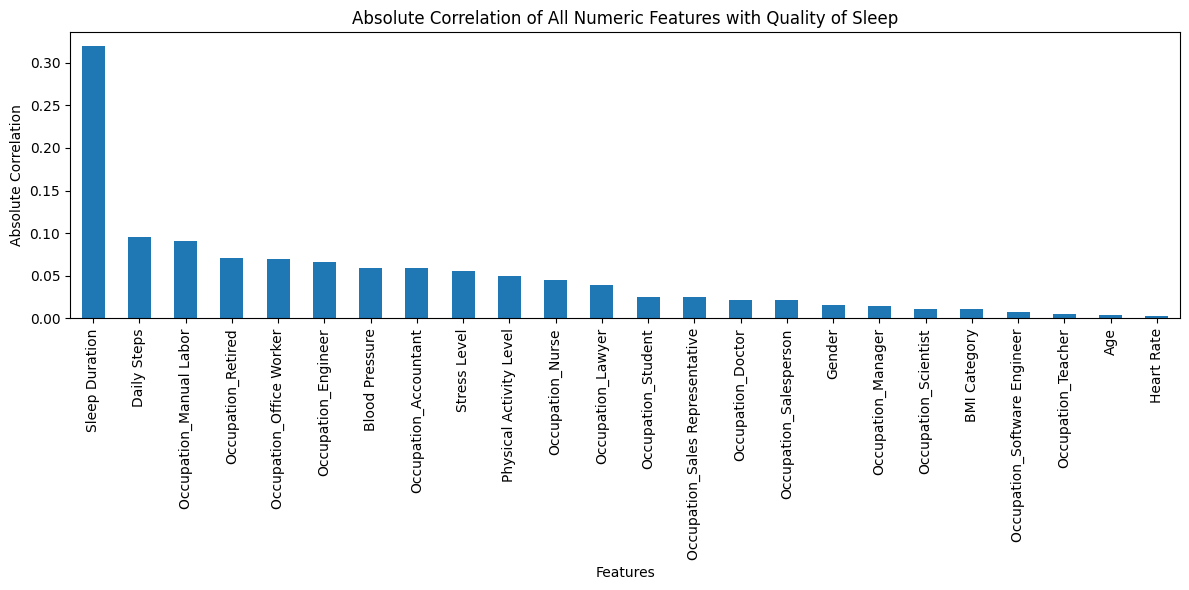

In [31]:
# Feature Correlation with Quality of Sleep (All Numeric Features)
import matplotlib.pyplot as plt
target='Quality of Sleep'
corr_all=df.corr()[target].drop(target).abs().sort_values(ascending=False)
plt.figure(figsize=(12,6))
corr_all.plot(kind='bar')
plt.title('Absolute Correlation of All Numeric Features with Quality of Sleep')
plt.ylabel('Absolute Correlation')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


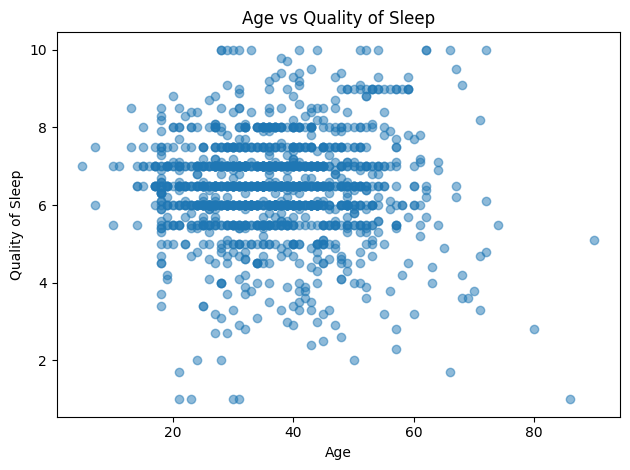

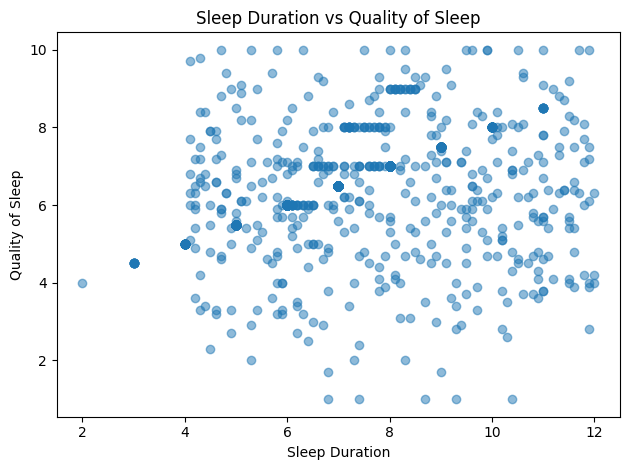

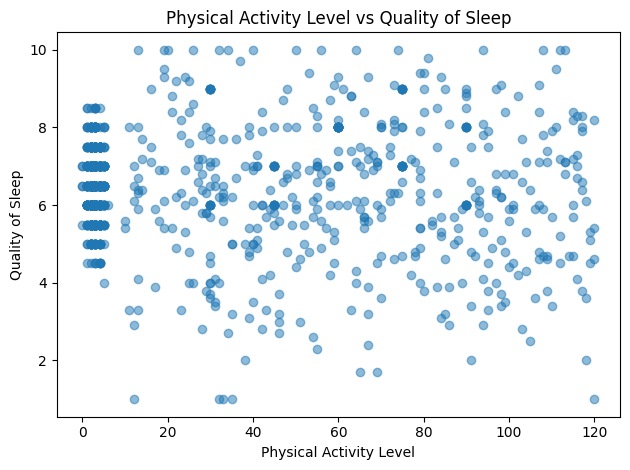

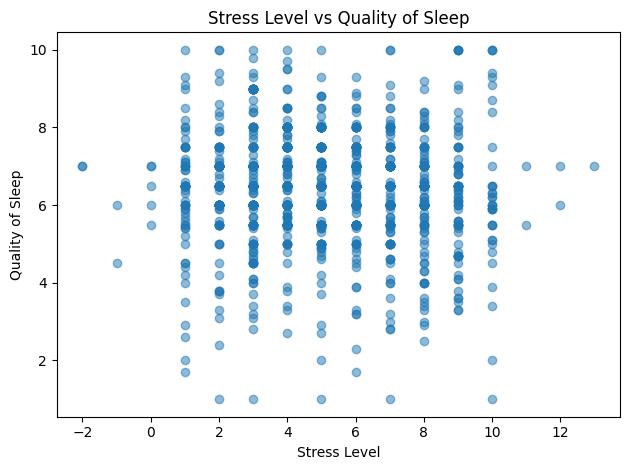

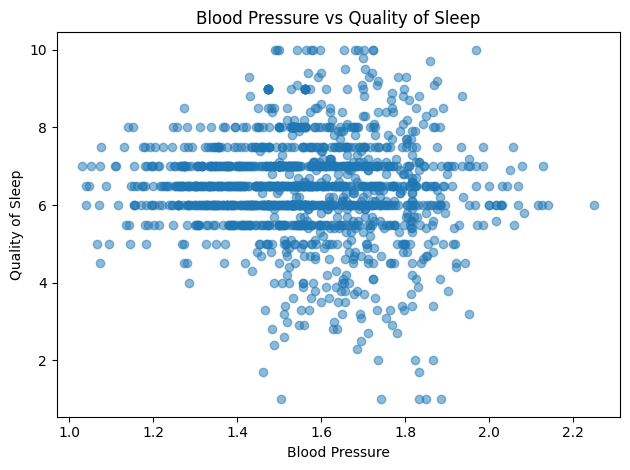

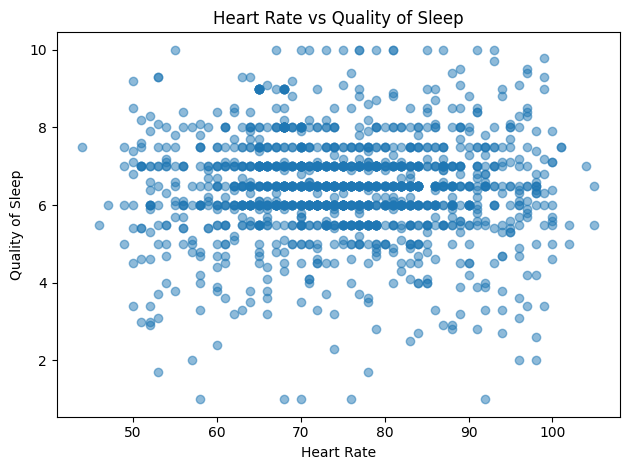

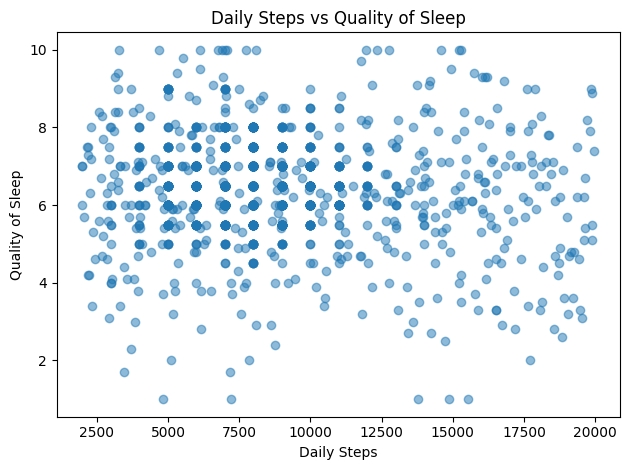

In [32]:
# scatter plot lkol el numeric features ma3 el target 
target = 'Quality of Sleep'
numeric_feats = ['Age', 'Sleep Duration', 
                 'Physical Activity Level', 'Stress Level', 
                 'Blood Pressure', 'Heart Rate', 'Daily Steps']
for col in numeric_feats:
    plt.figure()
    plt.scatter(df[col],df[target],alpha=0.5)
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

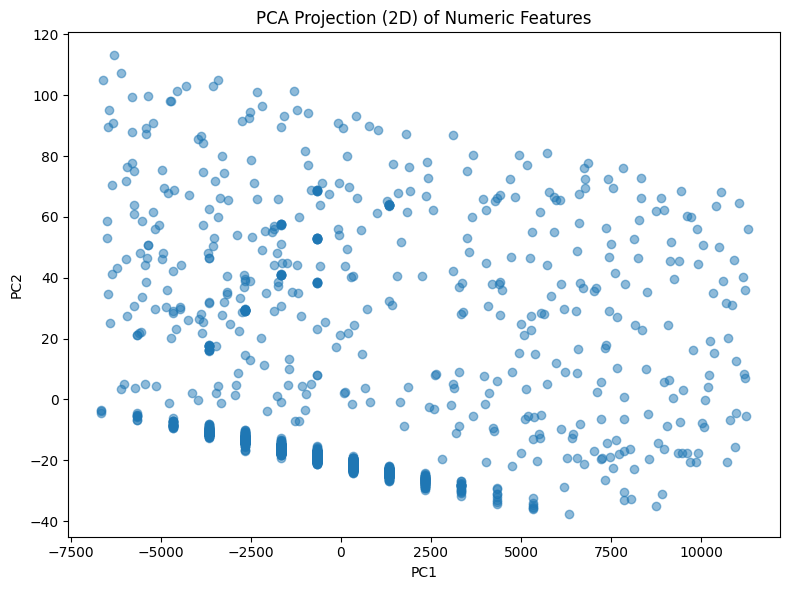

In [33]:
#bta5od el-data el-keteer (features), w telf kol el-axisat 3ala ba3ed, 3ashan tgeb 2arab 2 axis bey‐wadd7a akbar 7etta fe-tanawwo3 el-data. 
# fa t2a2l el-dimensions w takhalli el-visualization aw el-modeling ashal, w bidoon ma tef2ed keteer men el ma3lomat
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['number']).dropna()
pca = PCA(n_components=2)
proj = pca.fit_transform(numeric_df)
plt.figure(figsize=(8, 6))
plt.scatter(proj[:, 0], proj[:, 1], alpha=0.5)
plt.title('PCA Projection (2D) of Numeric Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()


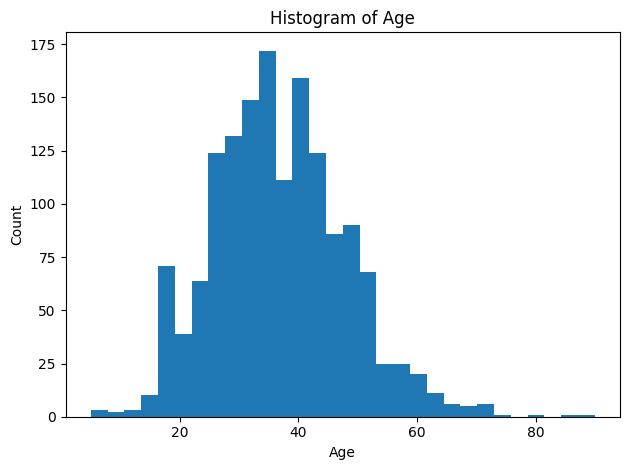

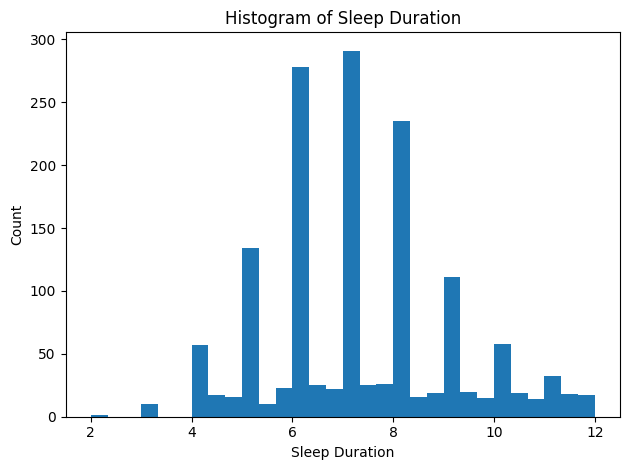

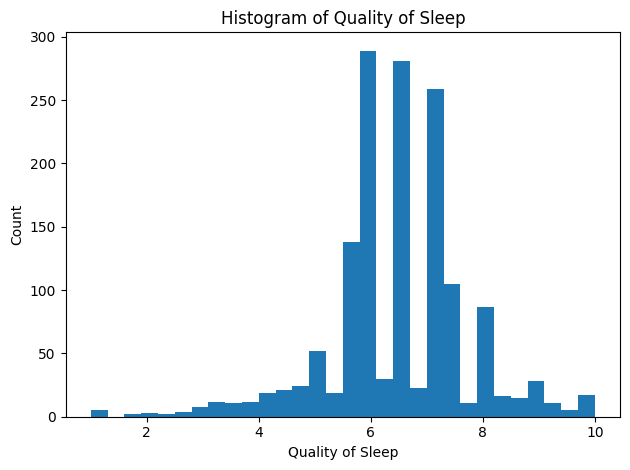

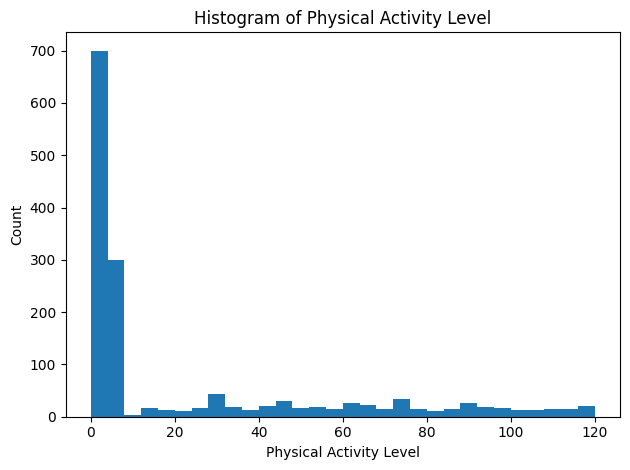

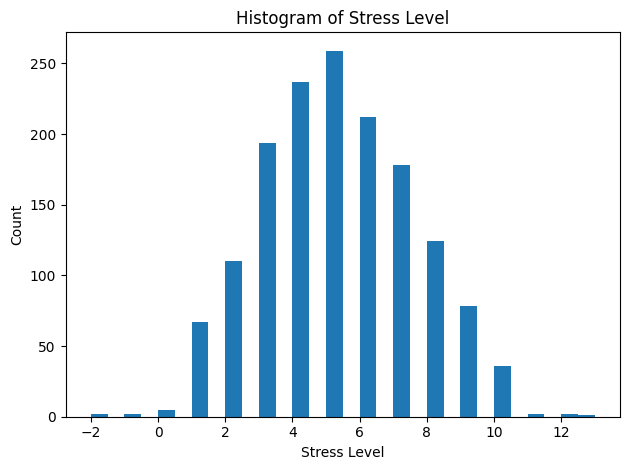

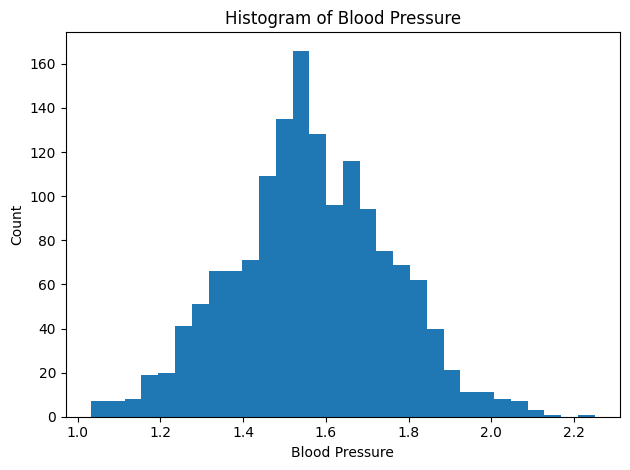

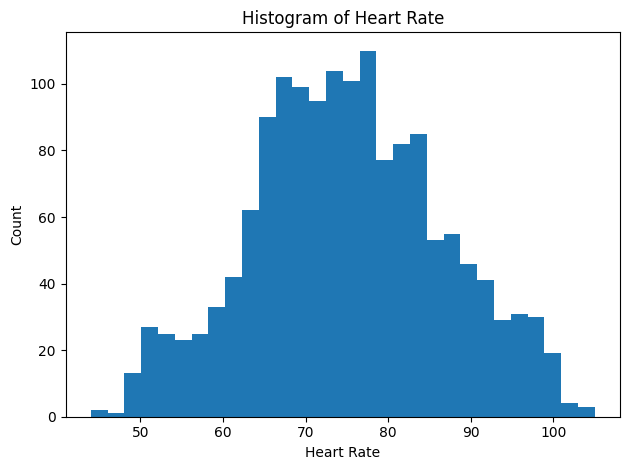

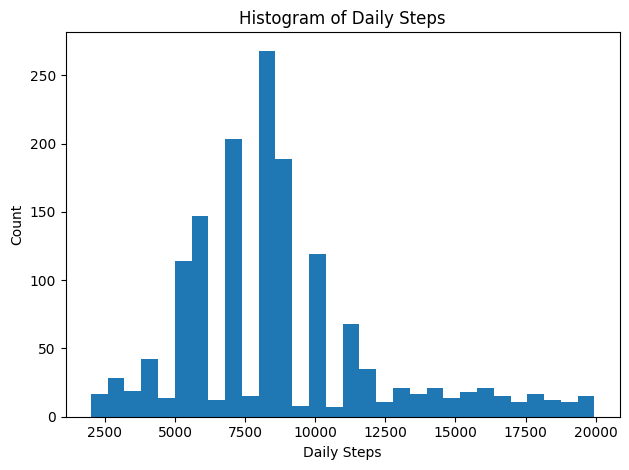

In [34]:
#histograms for numeric features 
import matplotlib.pyplot as plt
target = 'Quality of Sleep'
top_numeric = ['Age', 'Sleep Duration', 'Quality of Sleep', 
                 'Physical Activity Level', 'Stress Level', 
                 'Blood Pressure', 'Heart Rate', 'Daily Steps']

for col in top_numeric:
    data = df[col].dropna()
    plt.figure()
    plt.hist(data, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


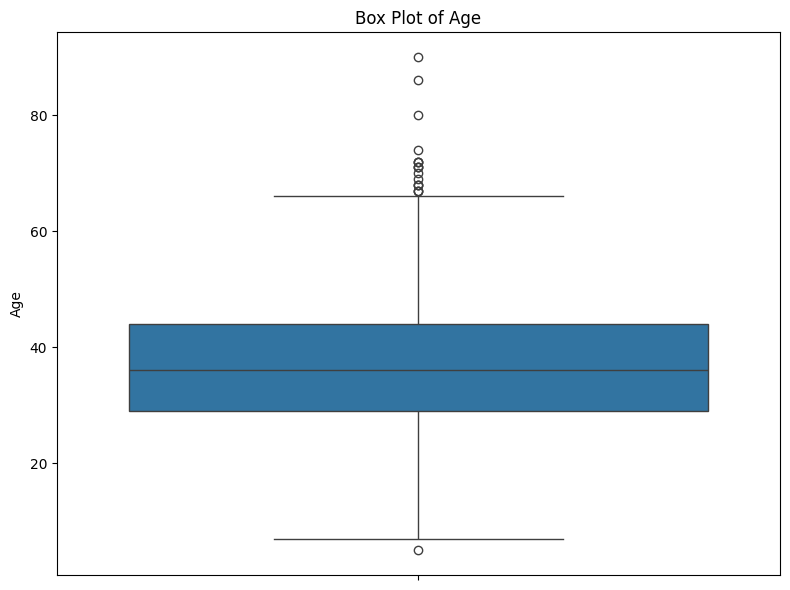

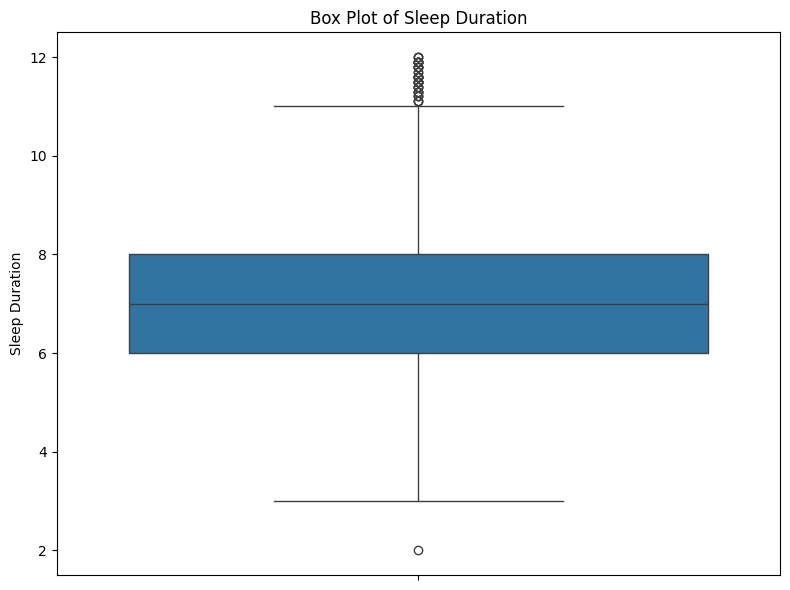

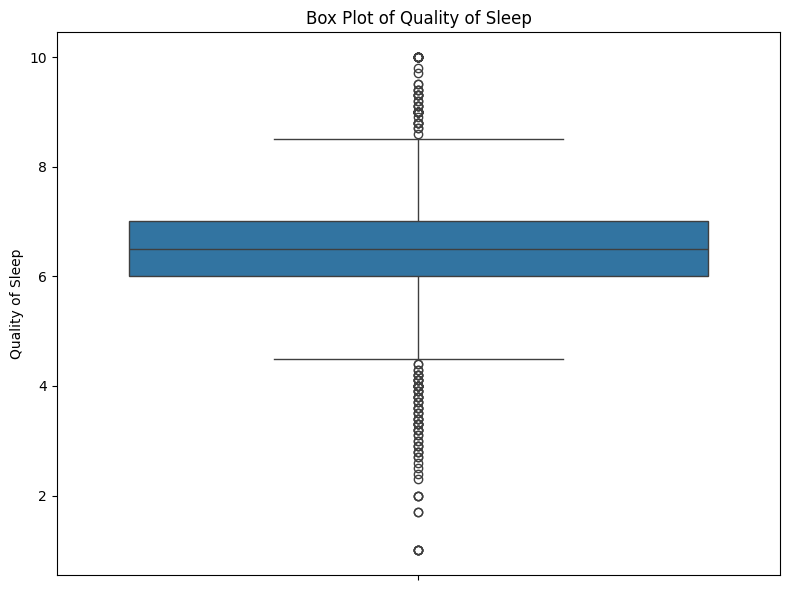

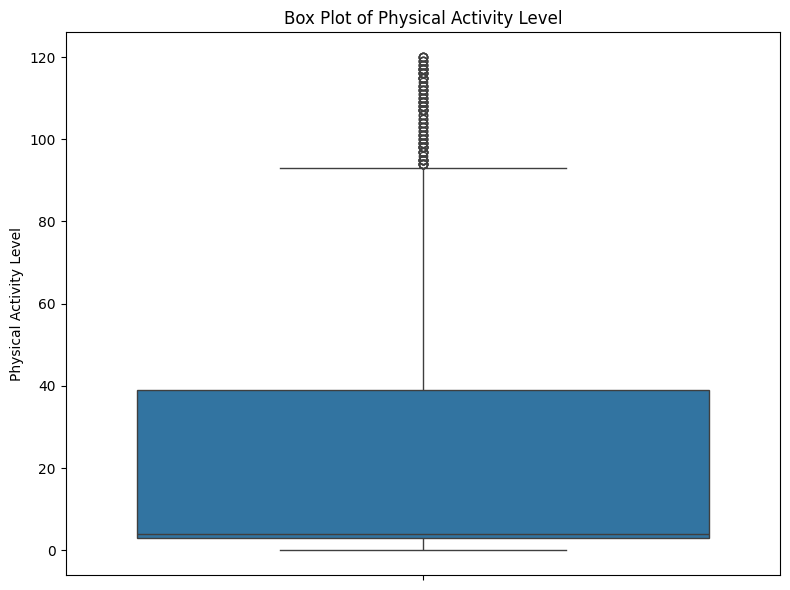

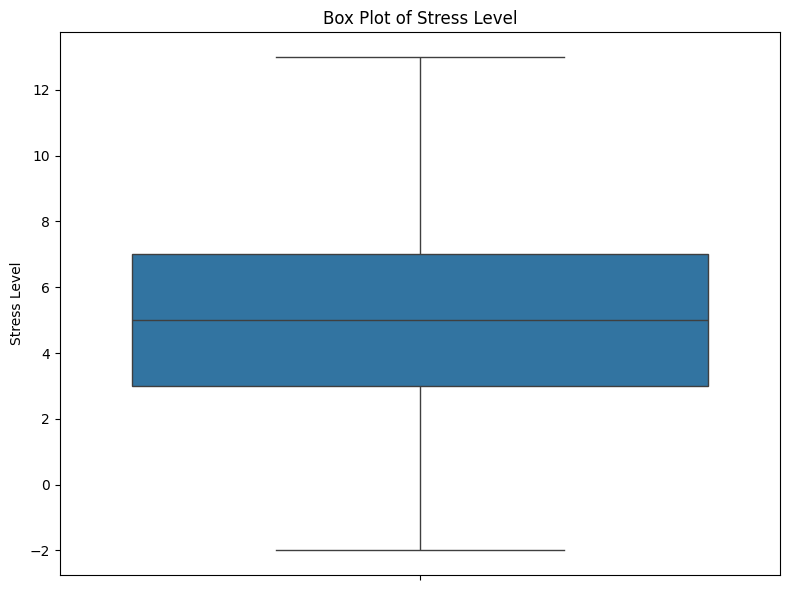

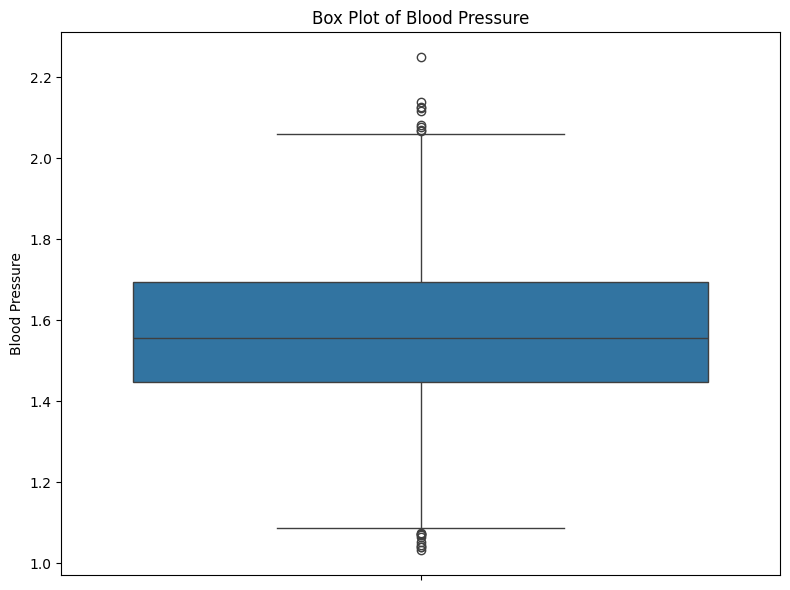

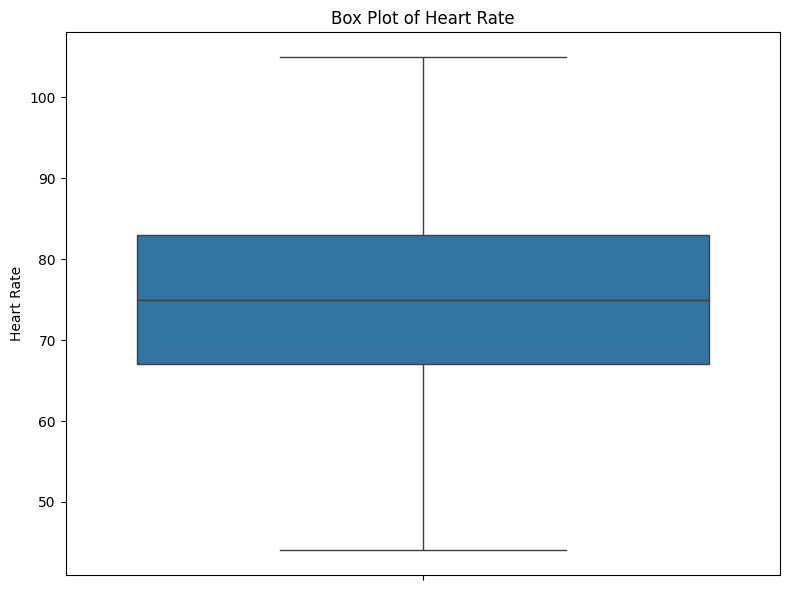

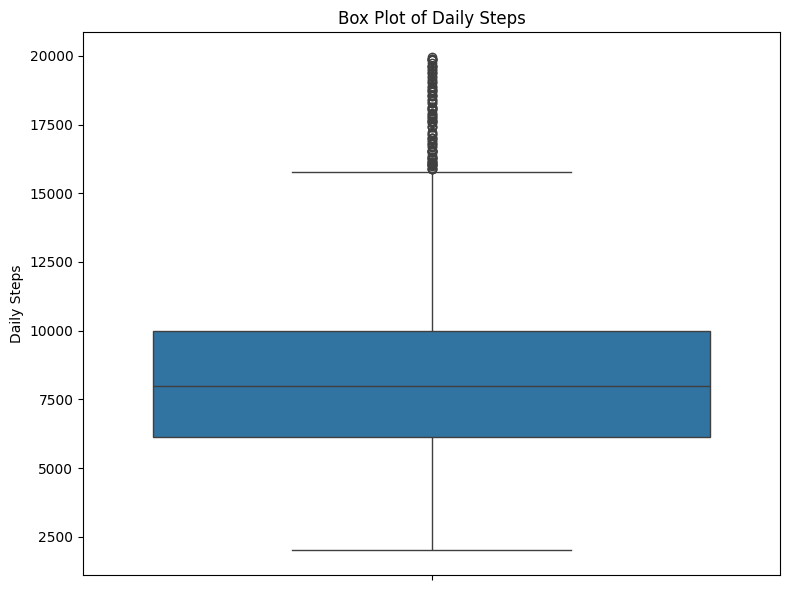

In [35]:
# Box plots for numeric features
numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 
                    'Physical Activity Level', 'Stress Level', 
                    'Blood Pressure', 'Heart Rate', 'Daily Steps']

for col in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

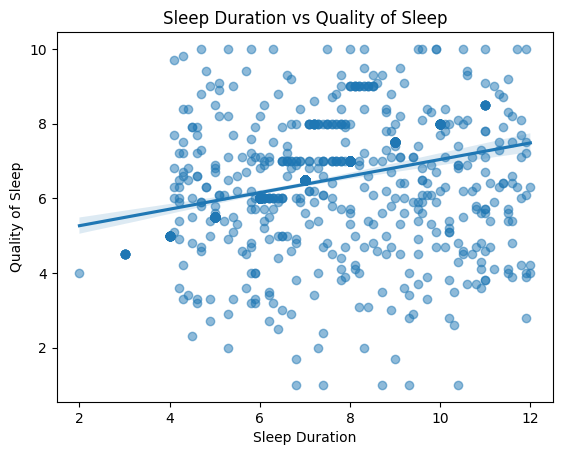

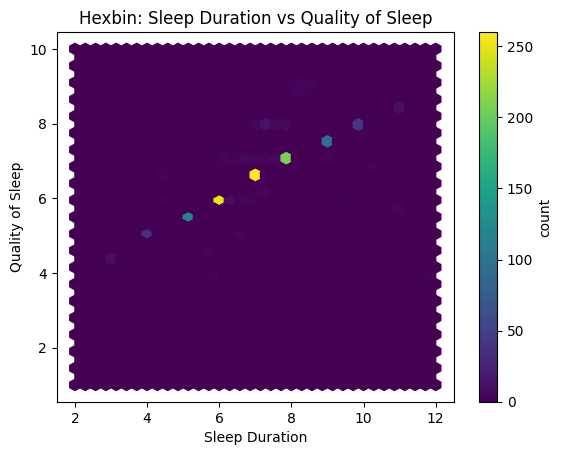

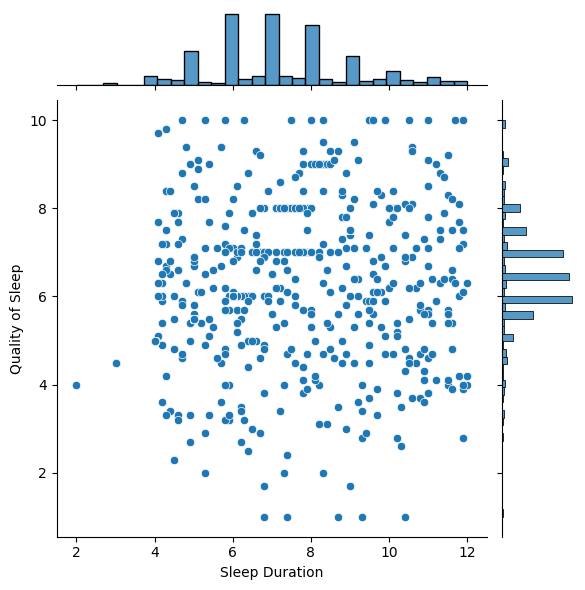

In [36]:
xcol, ycol = 'Sleep Duration', 'Quality of Sleep'
sns.regplot(x=xcol, y=ycol, data=df, scatter_kws={'alpha':0.5})
plt.title(f'{xcol} vs {ycol}')
plt.show()
plt.hexbin(df[xcol], df[ycol], gridsize=35, cmap='viridis')
plt.colorbar(label='count'); plt.xlabel(xcol); plt.ylabel(ycol)
plt.title(f'Hexbin: {xcol} vs {ycol}')
plt.show()
sns.jointplot(x=xcol, y=ycol, data=df, kind='scatter')